In [3]:
import json
import pandas as pd

In [17]:
with open('/root/PlotQA/data/translated_test/annotations.json', 'r') as file:
    data = json.load(file)

# data의 구조에 따라 데이터프레임을 생성합니다.
# 예를 들어 data가 리스트 형태라면:
if isinstance(data, list):
    df = pd.DataFrame(data)

In [18]:
single_df = df.iloc[7180]

In [32]:
single_df

models                 [{'name': '사망률', 'labels': 'Death rate', 'widt...
type                                                    hbar_categorical
general_figure_info    {'title': {'text': '1960년 조사에 따른 사망률과 출생률', 'b...
image_index                                                         7180
Name: 7180, dtype: object

In [28]:
rows = []
general_figure_info = single_df['general_figure_info']
for model in models:
    if len(models) == 1:
        label = general_figure_info['title']['text']
    else:
        label = model['name']
    x_values = general_figure_info['y_axis']['major_labels']['values']
    y_values = model['x']

    for x, y in zip(x_values, y_values):
        if isinstance(y, float):
            if y.is_integer():
                y = int(y)  # float 값을 정수로 변환
            else:
                y = round(y, 3)
        if isinstance(x, float):
            if x.is_integer():
                x = int(x)  # float 값을 정수로 변환
            else:
                x = round(x, 3) 
        rows.append({'특성': label, 'X': x, 'Y': y})

"특성","고체연료","기체 연료","액체연료"
"마카오",11.001,528.048,517.047
"말라위",172.349,711.398,495.045
"불가리아",36603.994,77487.377,30960.481
"폴란드",381210.319,464575.897,56295.784



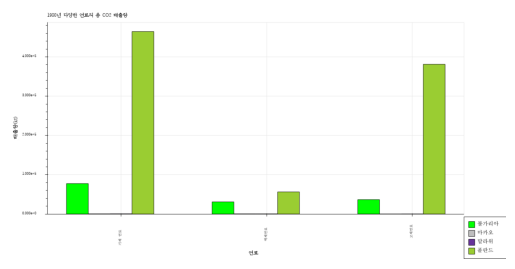

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 열기
idx = 31000
image_path = f"/root/PlotQA/data/translated_test/png/{idx}.png"
csv_path = f"/root/PlotQA/data/translated_test/csv/{idx}.csv"
with open(csv_path, 'r') as f:
    csv = f.read()
print(csv)
image = Image.open(image_path)
# 이미지 보여주기 (matplotlib를 사용)
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [15]:
with open('/root/PlotQA/data/translated_test/csv/7180.csv', 'r') as f:
    data = f.read()

In [16]:
data

'"특성","Middle income","North America","OECD members","Other small states","Pacific island small states","Small states"\n"사망률",20.939,9.347,10.334,20.889,13.151,16.385\n"출생률",35.077,23.972,23.11,42.942,45.504,42.087\n'